***

<center><u><H1>Image processing</H1></u></center>

***

***
# Introduzione

Il nostro cervello cerca delle feature nell'immagine (come i contorni) per estrarre dei pattern in modo da classificare l'immagine. Una rete neurale convoluzionale opera in un modo simile: ispirata alla corteccia visiva degli animali, classifica le immagini in base alle feature osservate in fase di all'addestramento (immagini con label) ricevuto. Invece dei prodotti matriciali, ricorrono alla **convoluzione**.

In questo notebook, esploriamo i concetti di convoluzione e image processing, per meglio comprendere il funzionamento di una Convolutional Neural Network (CNN).

## Rappresentazione dei pixel

Un'immagine è una matrice dove ogni elemento corrisponde ad un pixel:
- immagini in bianco e nero: una singola matrice in due dimensioni, dove ogni pixel può assumere un valore tra 0 e 255 (8 bit per pixel) che rappresenta la luminosità (0 corrisponde al nero e 1 corrisponde al bianco);
- immagini a colori: hanno 3 matrici 2D, una per il rosso, una per il blu e una per il verde (RGB), dove ogni pixel di nuovo è codificato a 8 bit.

Ad esempio, ricorriamo al modulo [scikit-image](https://scikit-image.org) per importare la famosa immagine di [Lena](https://en.wikipedia.org/wiki/Lenna), spesso usata per testare soluzioni di image processing. Il metodo [imread](https://scikit-image.org/docs/0.24.x/api/skimage.io.html#skimage.io.imread) permette di leggere un'immagine, ovvero di caricare i valori dei suoi pixel in 3 matrici NumPy RGB:

In [1]:
from skimage.io import imread
lena_original = imread('lena.png')
lena_original

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

Si potrebbe anche utilizzare il metodo [imread()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html) di matplotlib.pyplot, che però ha un piccolo inconveniente: quando legge dei file con estensione .png, li legge come dei float. In questi casi, conviene convertire in jpg l'immagine e poi usare questa funzione.

Possiamo notare che il data type degli elementi di questo array 3D NumPy è **uint8**: i pixel sono appunto codificati con 8 bit. Se volessimo ottenere la conversione in bianco e nero di questa immagine, potremmo usare la funzione [rgb2gray](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray):

In [2]:
from skimage.color import rgb2gray
lena_gray = rgb2gray(lena_original)

print(f'Originale: {lena_original.shape}')
print(f'B&W: {lena_gray.shape}')

Originale: (512, 512, 3)
B&W: (512, 512)


Per mostrare un'immagine, è sufficiente importare matplotlib e ricorrere alla funzione imshow:

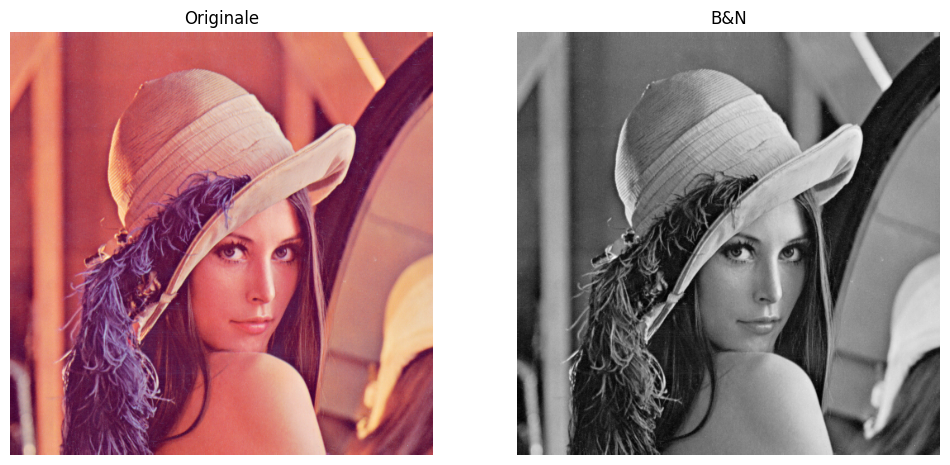

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(lena_original)
axs[0].set_title('Originale')
axs[0].axis('off')

axs[1].imshow(lena_gray, cmap='gray')
axs[1].set_title('B&N')
axs[1].axis('off')

plt.show()

# Convoluzione

Per le immagini, è piuttosto semplice applicare dei filtri tramite la **convoluzione**: operazione matematica il cui risultato esprime quanto la forma di un oggetto (come una funzione o un'immagine) è modificata dall'altro. Matematicamente, partendo da una singola dimensione, ragionando in una dimensione, è data dalle seguenti espressioni:
- caso continuo: $(f*g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau)\mathrm{d}\tau$

- caso discreto: $(x*h)[n] = \sum_{m=-\infty}^{\infty}x[m]h[n-m]$

Concentrandoci sul caso discreto, vediamo cosa accade in un esempio: vogliamo ottenere la posizione in corrispondenza del quale cambia il bit di una sequenza in ingresso (attenzione: in base alla formula, il filtro viene invertito prima di "passarlo" sopra la sequenza da un punto di vista visivo).

La funzione [convolve](https://numpy.org/doc/2.1/reference/generated/numpy.convolve.html) calcola la convoluzione. Tra gli argomenti in ingresso, notiamo **mode** che indica la modalità di convoluzione:
- **full**: modalità di default in cui si applica un padding alla sequenza in ingresso sia a destra sia a sinistra di $K-1$ valori (dove $K$ è il numero di bit del filtro);
- **same**: si estraggono $N$ campioni dal risultato della modalità full per avere la stessa lunghezza della sequenza in ingresso;
- **valid**: la convoluzione viene calcolata solo quando si ha la totale sovrapposizione tra filtro e sequenza in ingresso.

In [4]:
import numpy as np

input_bit = np.array([0, 0, 0, 0, 1, 1, 1])
filter = np.array([1, -1])
conv_1d = np.convolve(input_bit, filter, 'valid')

print(f"[valid] --> {input_bit} * {filter} = {conv_1d}")

[valid] --> [0 0 0 0 1 1 1] * [ 1 -1] = [0 0 0 1 0 0]


In [5]:
input_bit = np.array([0, 0, 0, 0, 1, 1, 1])
filter = np.array([1, -1])
conv_1d = np.convolve(input_bit, filter, 'full')

print(f"[full] --> {input_bit} * {filter} = {conv_1d}")

[full] --> [0 0 0 0 1 1 1] * [ 1 -1] = [ 0  0  0  0  1  0  0 -1]


In [6]:
input_bit = np.array([0, 0, 0, 0, 1, 1, 1])
filter = np.array([1, -1])
conv_1d = np.convolve(input_bit, filter, 'same')

print(f"[same] --> {input_bit} * {filter} = {conv_1d}")

[same] --> [0 0 0 0 1 1 1] * [ 1 -1] = [0 0 0 0 1 0 0]


In due dimensioni, la convoluzione diviene: $(X*H)[n] = \sum_{i=-N}^N\sum_{j=-N}^NX[n, m]H[n-i, m-j]$.

# Filtraggio delle immagini

Nel filtrare le immagini tramite convoluzione con dei filtri, ipotizziamo di avere:
- un'immagine in ingresso di dimensione $N\times N$;
- $F$ filtri applicati all'immagine, ognuno di dimensione $L\times L$;
- uno **stride** pari a $S$ (passo con cui si scorre l'immagine);
- un **padding** pari a $P$ (numero di 0 aggiunti ai bordi).

In queste condizioni, in uscita avremo $F$ immagini filtrate ognuna di dimensione $(\frac{N+2P-L}{S}+1)\times (\frac{N+2P-L}{S}+1)$. Per il momento, lavoriamo con un filtro alla volta (i filtri paralleli saranno implementati nella CNN).

Per lavorare con una immagine a colori, ci occorre applicare la convoluzione ad ognuna delle 3 matrici 2D che vengono importate tramite imread(). Per semplificare il codice, creiamo una funzione rgb_convolve che applica la convoluzione a tutte e 3 le componenti e ritorna una matrice NumPy 3D. La convoluzione in 2D si effettua rapidamente con la funzione [convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) del modulo scipy.signal, che opera in modo simile al caso 1D implementato con NumPy.

In [7]:
from scipy.signal import convolve2d
def rgb_convolve(image, kernel):
    """
    Questa funzione applica un filtro (kernel) ad una immagine a colori.
    :param image: immagine in ingresso nel formato RGB.
    :param kernel: filtro da applicare all'immagine.
    :return: immagine filtrata in formato RGB.
    """
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)

## Identità

Come suggerisce il nome, questo filtro fornisce l'immagine non modificata. E' comunque utile per capire come un certo design del filtro modifica le immagini:

(-0.5, 509.5, 509.5, -0.5)

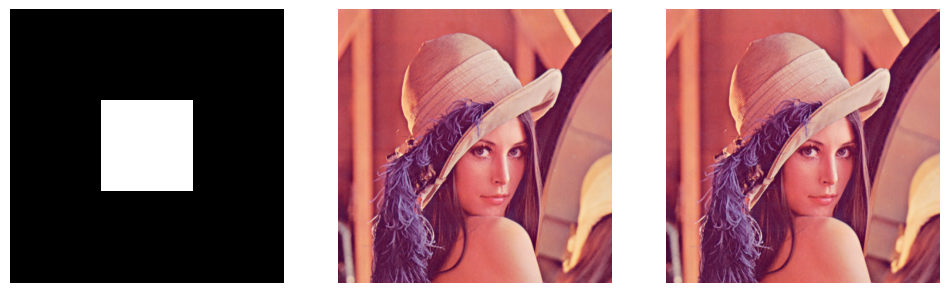

In [10]:
kernel = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]])
conv_im = rgb_convolve(lena_original, kernel)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im))
ax[2].axis('off')

## Edge detection

Sono dei filtri che permettono di rilevare i bordi e i contorni nell'immagine basandosi sulle discontinuità. Va notato che, basandosi su una differenziazione, la somma degli elementi del filtro deve essere sempre nulla altrimenti si introdurrebbe un peso maggiore per alcuni pixel.

(-0.5, 509.5, 509.5, -0.5)

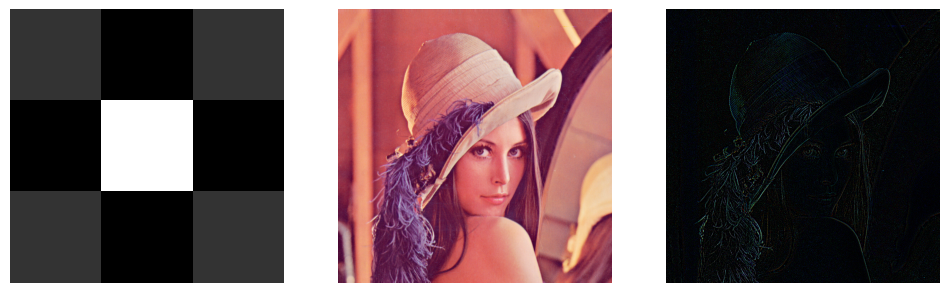

In [14]:
kernel = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im))
ax[2].axis('off')

(-0.5, 509.5, 509.5, -0.5)

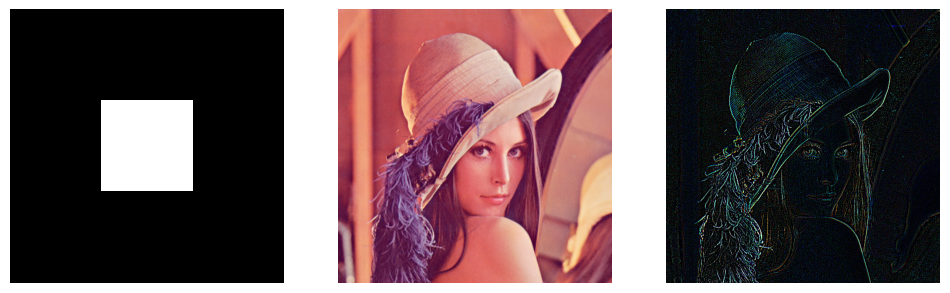

In [15]:
kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im))
ax[2].axis('off')

Gli operatori di [Sobel](https://it.wikipedia.org/wiki/Operatore_di_Sobel) sono piuttosto famosi per il riconoscimento dei contorni. Sono sempre degli operatori differenziali, che si applicano per valutare la derivata (o, meglio, un'approssimazione del gradiente) in una certa direzione. Vediamone alcuni esempi:
- bottom sobel:

(-0.5, 509.5, 509.5, -0.5)

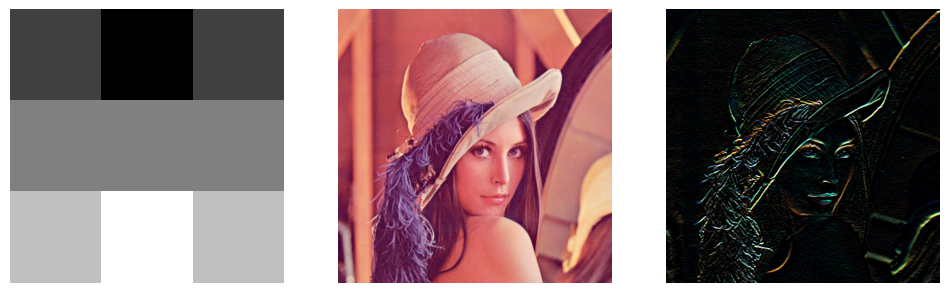

In [16]:
kernel = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im))
ax[2].axis('off')

- top sobel:

(-0.5, 509.5, 509.5, -0.5)

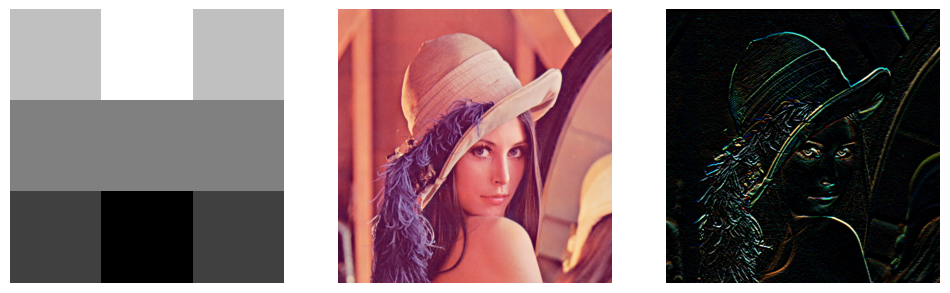

In [17]:
kernel = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im))
ax[2].axis('off')

- left sobel

(-0.5, 509.5, 509.5, -0.5)

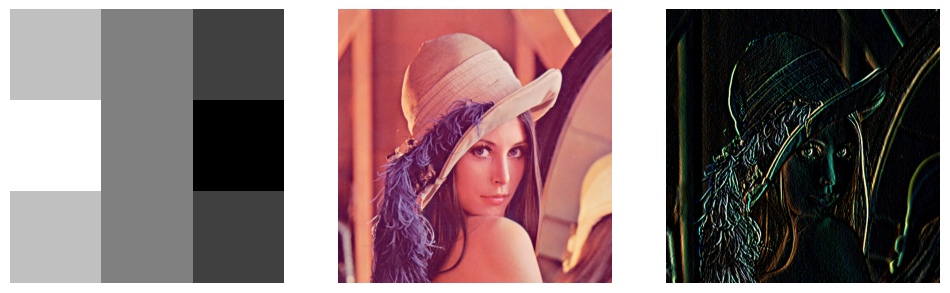

In [18]:
kernel = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im))
ax[2].axis('off')

- right sobel

(-0.5, 509.5, 509.5, -0.5)

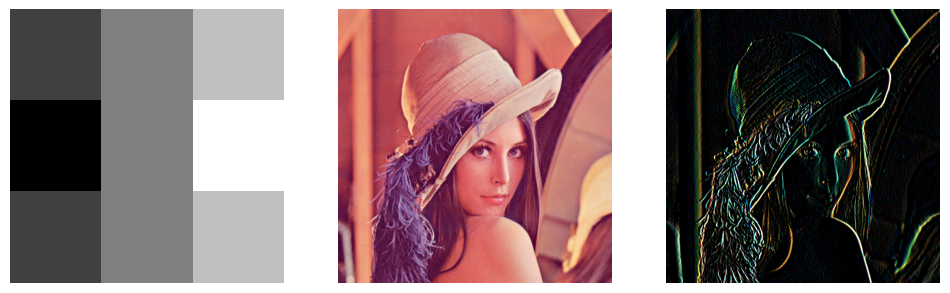

In [19]:
kernel = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im))
ax[2].axis('off')

## Sharpening

Filtri per evidenziare dettagli e contorni nell'immagine:
- sharpening normale

(-0.5, 509.5, 509.5, -0.5)

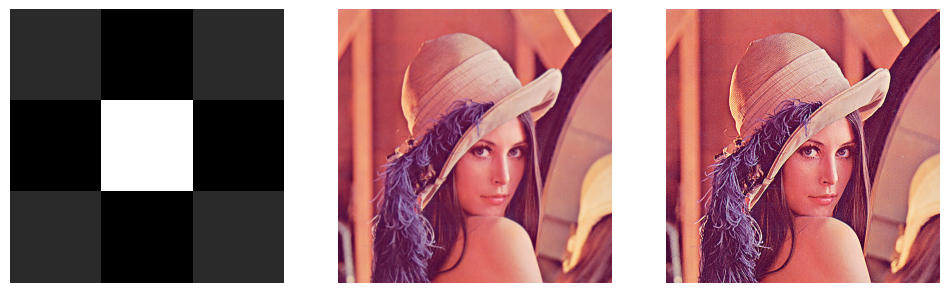

In [20]:
kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im))
ax[2].axis('off')

- sharpening con kernel Laplaciano

(-0.5, 509.5, 509.5, -0.5)

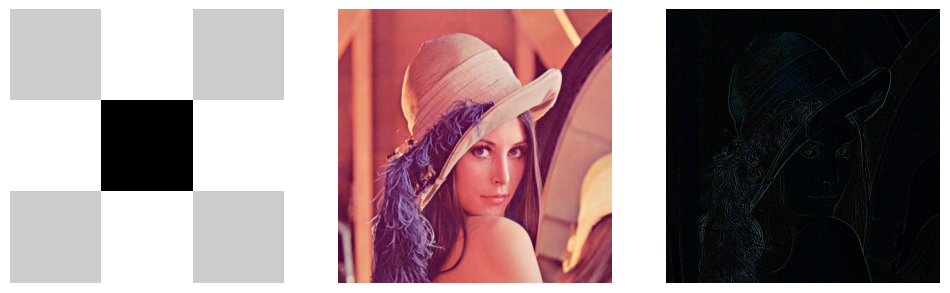

In [21]:
kernel = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im))
ax[2].axis('off')

## Blur

Ogni filtro viene sotituito dalla media dei suoi vicini:

(-0.5, 509.5, 509.5, -0.5)

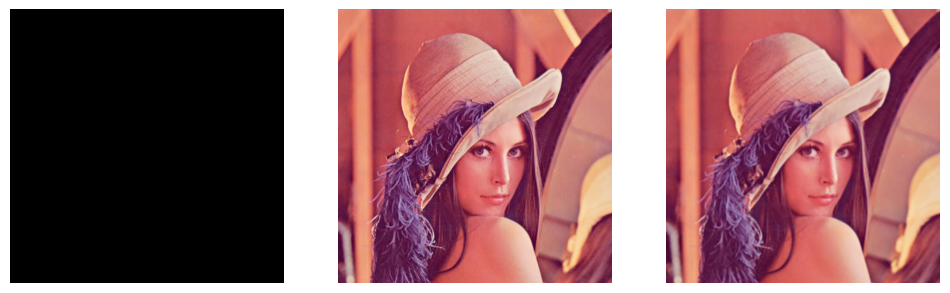

In [23]:
kernel = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]]) * 1/9
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im).astype('uint8'))
ax[2].axis('off')

Kernel Gaussiano $3\times 3$:

(-0.5, 509.5, 509.5, -0.5)

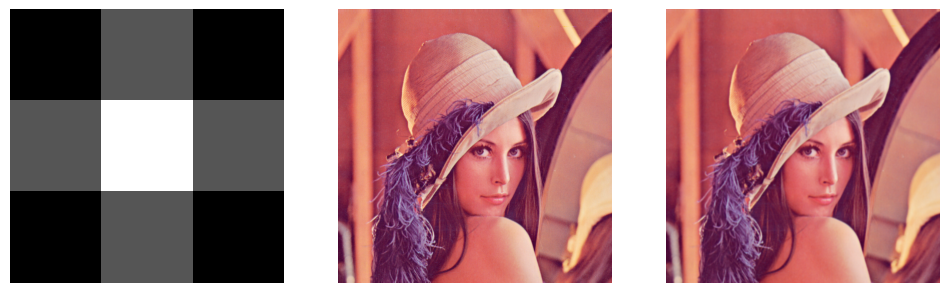

In [24]:
kernel = (1 / 16) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im).astype('uint8'))
ax[2].axis('off')

Kernel Gaussiano $5\times 5$:

(-0.5, 507.5, 507.5, -0.5)

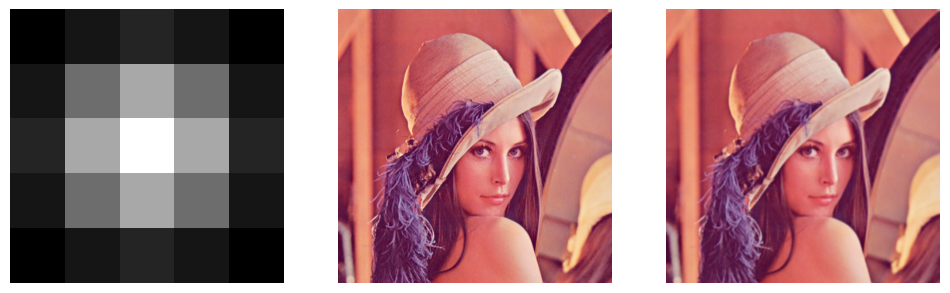

In [25]:
kernel = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
conv_im = rgb_convolve(lena_original, kernel).clip(0, 255)

_, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(kernel, cmap='gray')
ax[0].axis('off')

ax[1].imshow(lena_original)
ax[1].axis('off')

ax[2].imshow(abs(conv_im).astype('uint8'))
ax[2].axis('off')